In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


#IMPORT LIBRARIES

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [26]:
dataset= pd.read_csv('Salary_Data.csv')

dataset.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#HANDLING CATEGORICAL DATA

In [27]:
x = dataset[['YearsExperience']]
#separate the other attributes from the predicting attribute

In [28]:
y = dataset[['Salary']]
#separte the predicting attribute into Y for model training 

In [29]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
dataset = pd.read_csv('Salary_Data.csv') 

x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()

x[:,0] = labelencoder_X.fit_transform(x[:,0])
#x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]
 [21.]
 [22.]
 [23.]
 [24.]
 [25.]
 [26.]
 [27.]]


#GRAPHS

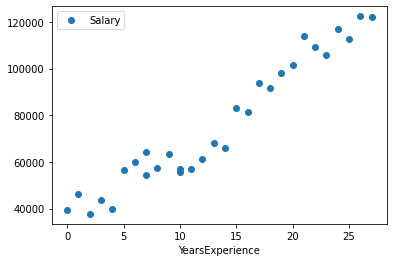

In [30]:
dataset.plot(x = 'YearsExperience', y = 'Salary', style='o')
plt.show()

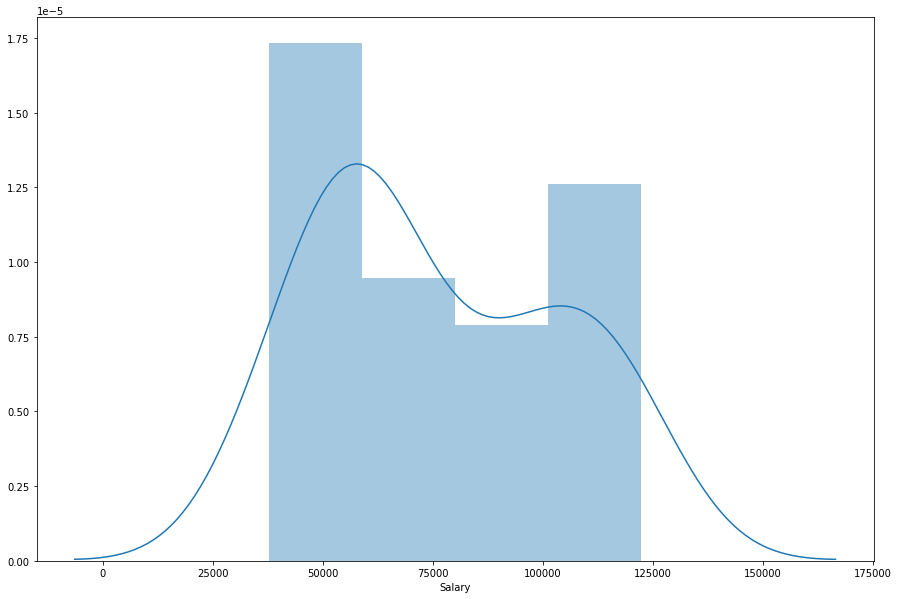

In [31]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['Salary'])
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [33]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

print(X_train_norm)
print(X_test_norm)

[[0.92592593]
 [0.37037037]
 [0.55555556]
 [0.74074074]
 [0.18518519]
 [0.51851852]
 [0.25925926]
 [0.44444444]
 [0.77777778]
 [0.66666667]
 [0.03703704]
 [1.        ]
 [0.22222222]
 [0.14814815]
 [0.59259259]
 [0.62962963]
 [0.2962963 ]
 [0.25925926]
 [0.85185185]
 [0.11111111]
 [0.        ]
 [0.7037037 ]
 [0.48148148]
 [0.37037037]]
[[0.07407407]
 [0.96296296]
 [0.40740741]
 [0.33333333]
 [0.88888889]
 [0.81481481]]


#ALGORITHM

In [34]:
model =LinearRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [35]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
print('Intercept is :',model.intercept_)

Intercept is : 34166.351730045586


In [37]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [3167.03175574]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [38]:
predictions = model.predict(x_test)

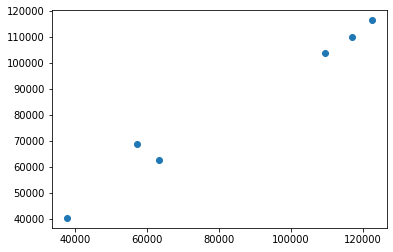

In [39]:
plt.scatter(y_test,predictions)
#to visualise the predictions and the test Y !!it is almost forming a linear line with less deviation

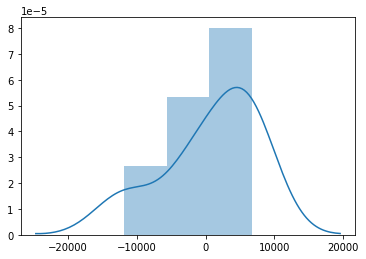

In [40]:
import seaborn as sns
sns.distplot((y_test-predictions))

#EVALUATION

In [41]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [42]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([ 40500.41524153, 116509.17737939,  69003.70104323,  62669.63753174,
       110175.1138679 , 103841.05035641])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [43]:
y_train = y_train[0:6]

In [44]:
from sklearn.metrics import confusion_matrix

cutoff = 0.7                                   # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[6]]


Precision, Recall, Support, Fscore

In [45]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [46]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[6]]


Precision, Recall, Support, Fscore

In [47]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)